## Trabajo Final - Ana Sofia garcia

**Problema propuesto: Predicción de abandono de clientes (Customer Churn) en una empresa de telecomunicaciones.**

**Objetivo:** Clasificar si un cliente abandonará (churn) o no los servicios de la empresa basado en características como uso del servicio, tipo de contrato, facturación, etc. Este es un problema de clasificación binaria, relevante en industrias como telecomunicaciones, banca o comercio electrónico.

**Justificación:** Es un problema común en ciencia de datos, con datasets disponibles que cumplen los requisitos de tamaño, atributos y datos faltantes. Además, es adaptable a diferentes áreas de interés.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset.csv')
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
# Estadísticas para numéricas
print(df.describe())
# Frecuencias para categóricas
print(df['Contract'].value_counts())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


**Visualizaciones**

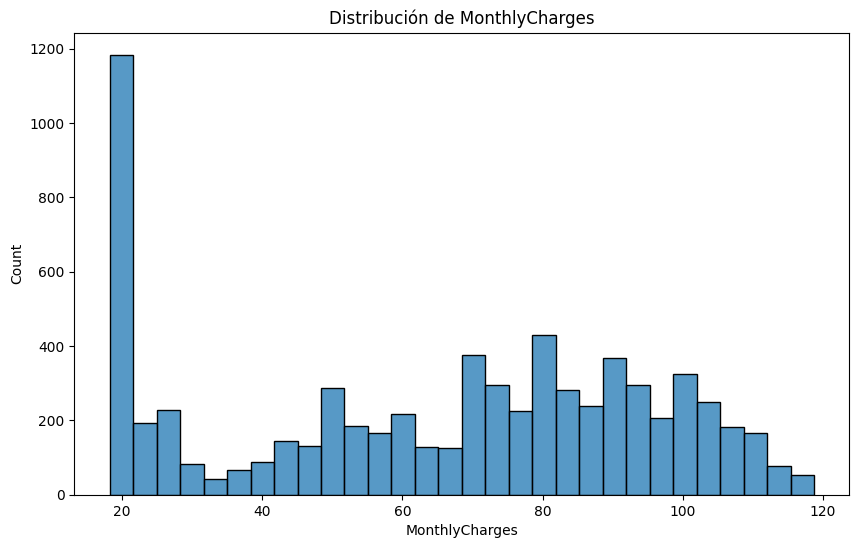

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30)
plt.title('Distribución de MonthlyCharges')
plt.show()

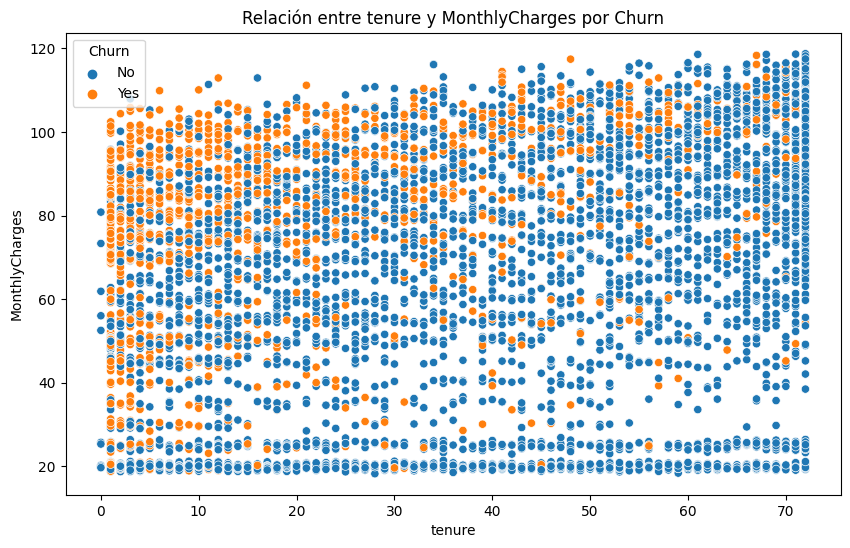

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Relación entre tenure y MonthlyCharges por Churn')
plt.show()

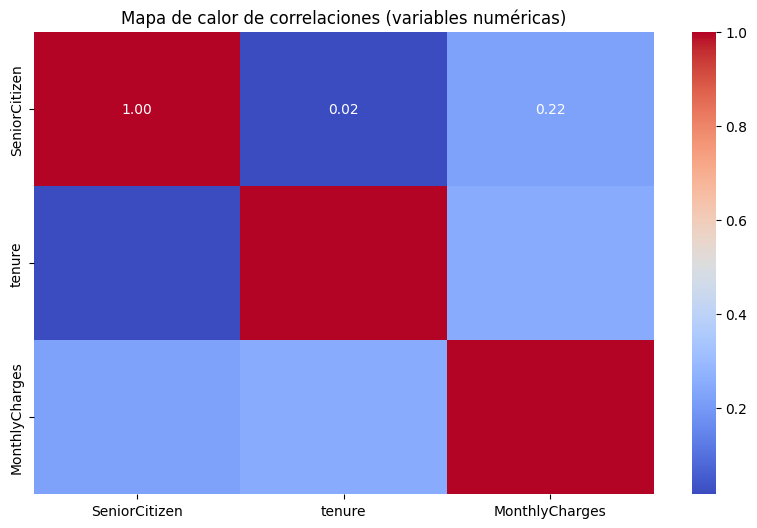

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones (variables numéricas)')
plt.show()

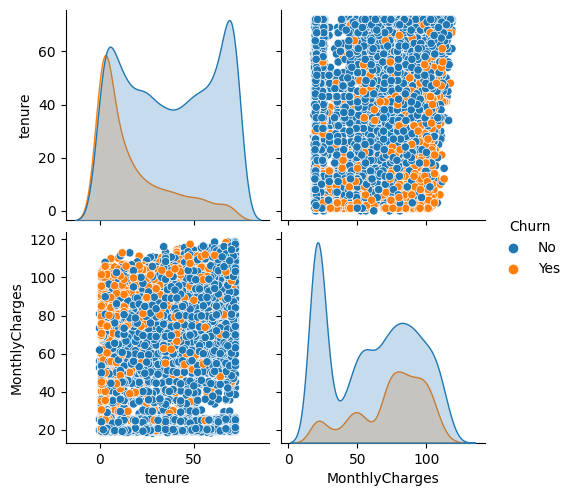

In [8]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

**Valores atípicos**

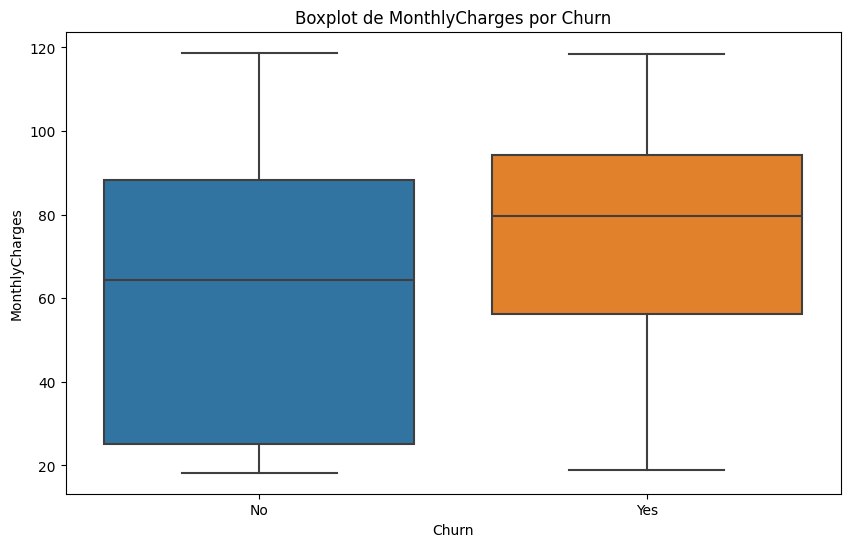

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Boxplot de MonthlyCharges por Churn')
plt.show()

**Datos faltantes**

In [10]:
print(df.isnull().sum() / len(df) * 100)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


## Resumen de hallazgos

Descripción del dataset: El dataset contiene 7,043 instancias y 21 atributos, con una variable objetivo binaria (Churn: Yes/No). Incluye variables numéricas (tenure, MonthlyCharges, TotalCharges) y categóricas (Contract, PaymentMethod, etc.).

Datos faltantes: La columna TotalCharges tiene valores faltantes (aproximadamente 0.16% del total). Otras columnas no presentan datos faltantes, pero se simularán valores faltantes para cumplir con el requisito del 5%.

Distribuciones:
tenure: Distribución bimodal, con picos en clientes nuevos (~0-10 meses) y antiguos (~60-70 meses).
MonthlyCharges: Distribución sesgada hacia la derecha, con la mayoría de clientes pagando entre $20 y $80.
Churn: Desbalanceado, con ~73% de clientes no abandonando (No) y ~27% abandonando (Yes).

Correlaciones:
Fuerte correlación positiva entre tenure y TotalCharges (~0.83), esperado ya que los cargos totales acumulan con el tiempo. Correlación moderada entre MonthlyCharges y Churn, sugiriendo que clientes con facturas más altas tienden a abandonar.

Valores atípicos: No se detectaron outliers significativos en MonthlyCharges ni tenure según los boxplots.

Patrones:
Los clientes con contratos a corto plazo (Month-to-month) tienen mayor probabilidad de abandono que aquellos con contratos largos.
Clientes con servicios adicionales (ej., OnlineSecurity, TechSupport) tienden a tener menor churn.

Hipótesis:
Variables como Contract, MonthlyCharges y tenure son predictoras clave para el churn.
El desbalanceo de clases puede requerir técnicas como SMOTE durante el modelado.